# Class attention on random inputs
## FROZEN, DO NOT TOUCH

The simplest class attention setups possible.

In [1]:
import random

import torch
import torch.nn as nn
import torch.nn.functional as F

import wandb
from tqdm.auto import tqdm

In [23]:
def detorch(x):
    return x.detach().cpu().numpy()

In [17]:
input_size = 7
hidden_size = 11
n_classes = 3
batch_size = 5

In [48]:
class NotClassAttention(nn.Module):
    def __init__(self,):
        super().__init__()

        self.x_enc = nn.Sequential(nn.Linear(input_size, hidden_size),
                                   nn.ReLU(),
                                   nn.Linear(hidden_size, hidden_size),
                                   nn.Linear(hidden_size, n_classes))

    def forward(self, x):
        logits = self.x_enc(x)
        return logits


class ClassAttentionModel(nn.Module):
    def __init__(self,):
        super().__init__()

        self.x_enc = nn.Sequential(nn.Linear(input_size, hidden_size),
                                   nn.ReLU(),
                                   nn.Linear(hidden_size, hidden_size))

        self.c_enc = nn.Embedding(n_classes, hidden_size)

    def forward(self, x, c):
        h_x = self.x_enc(x)
        h_c = self.c_enc(c)
        
        logits = h_x @ h_c.T

        return logits


class ClassAttentionWNet(nn.Module):
    def __init__(self,):
        super().__init__()

        self.x_enc = nn.Sequential(nn.Linear(input_size, hidden_size),
                                   nn.ReLU(),
                                   nn.Linear(hidden_size, hidden_size))

        self.c_enc = nn.Sequential(nn.Embedding(n_classes, hidden_size),
                                   nn.ReLU(),
                                   nn.Linear(hidden_size, hidden_size))

    def forward(self, x, c):
        h_x = self.x_enc(x)
        h_c = self.c_enc(c)
        
        logits = h_x @ h_c.T

        return logits



In [45]:
x = torch.randn([batch_size, input_size])
possible_labels = [f'Class {str(i)}' for i in range(n_classes)]
label2c = {possible_labels[i]: i for i in range(len(possible_labels))}
c = torch.LongTensor([label2c[l] for l in possible_labels])

y_str = random.choices(possible_labels, k=batch_size)
y = torch.LongTensor([label2c[s] for s in y_str])


print("Possible labels: ", possible_labels)
print("Label2c        : ", label2c)
print("c              : ", c)

print("X: \n", x)
print("Labels         : ", y_str)
print("Labels Tensor  : ", y)

Possible labels:  ['Class 0', 'Class 1', 'Class 2']
Label2c        :  {'Class 0': 0, 'Class 1': 1, 'Class 2': 2}
c              :  tensor([0, 1, 2])
X: 
 tensor([[ 0.1427, -1.1256, -2.1442, -1.1444,  0.6893,  0.5743, -0.1997],
        [-0.5041, -0.3998,  0.1094, -2.0297, -0.0600, -1.0567, -1.3942],
        [-0.6546, -0.8031,  1.1207,  0.0285,  1.4299,  1.2655, -0.5005],
        [ 1.2154, -0.6174, -0.2491, -0.0401, -1.5158,  0.8255, -0.9595],
        [-1.3630, -0.3078,  1.0383,  0.0159,  0.2042, -0.2196, -0.4643]])
Labels         :  ['Class 2', 'Class 1', 'Class 0', 'Class 2', 'Class 0']
Labels Tensor  :  tensor([2, 1, 0, 2, 0])


## Sanity check
### Train an FCN model

Text(0.5, 1.0, 'Accuracy')

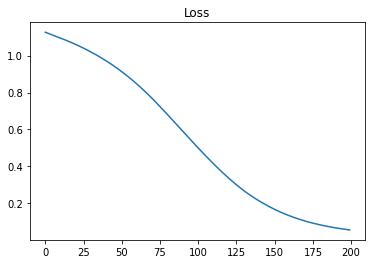

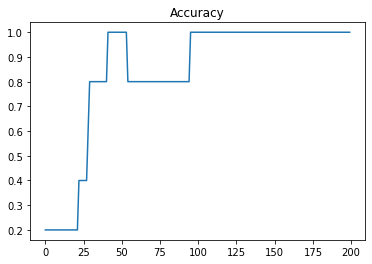

In [46]:
loss_hist = []
acc_hist = []

model = NotClassAttention()
optimizer = torch.optim.Adam(model.parameters())


for _ in tqdm(range(200)):
    optimizer.zero_grad()

    logits = model(x)

    loss = F.cross_entropy(logits, y)

    _, preds = logits.max(-1)
    acc = torch.sum(preds == y).float() / x.shape[0]
    
    acc_hist.append(detorch(acc))
    loss_hist.append(detorch(loss))

    loss.backward()
    optimizer.step()


plt.figure()
plt.plot(loss_hist)
plt.title('Loss')

plt.figure()
plt.plot(acc_hist)
plt.title('Accuracy')

## Train class attention equivalent to FCN

Text(0.5, 1.0, 'Accuracy')

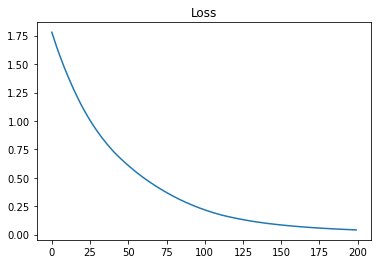

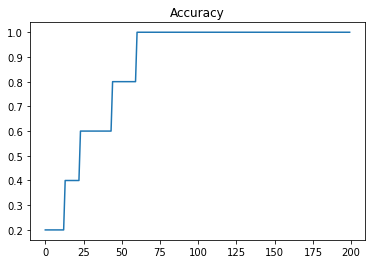

In [47]:
loss_hist = []
acc_hist = []

model = ClassAttentionModel()
optimizer = torch.optim.Adam(model.parameters())


for _ in tqdm(range(200)):
    optimizer.zero_grad()

    logits = model(x, c)
    
    loss = F.cross_entropy(logits, y)

    _, preds = logits.max(-1)
    acc = torch.sum(preds == y).float() / x.shape[0]
    
    acc_hist.append(detorch(acc))
    loss_hist.append(detorch(loss))

    loss.backward()
    optimizer.step()


plt.figure()
plt.plot(loss_hist)
plt.title('Loss')

plt.figure()
plt.plot(acc_hist)
plt.title('Accuracy')

## Train class attention with a classs network

Text(0.5, 1.0, 'Accuracy')

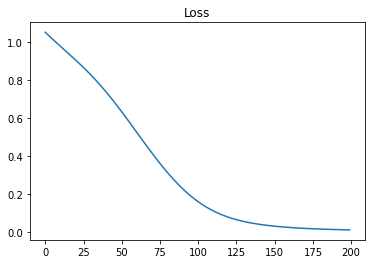

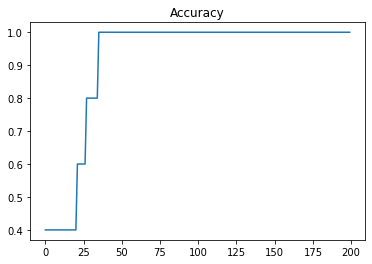

In [50]:
loss_hist = []
acc_hist = []

model = ClassAttentionWNet()
optimizer = torch.optim.Adam(model.parameters())


for _ in tqdm(range(200)):
    optimizer.zero_grad()

    logits = model(x, c)
    
    loss = F.cross_entropy(logits, y)

    _, preds = logits.max(-1)
    acc = torch.sum(preds == y).float() / x.shape[0]
    
    acc_hist.append(detorch(acc))
    loss_hist.append(detorch(loss))

    loss.backward()
    optimizer.step()


plt.figure()
plt.plot(loss_hist)
plt.title('Loss')

plt.figure()
plt.plot(acc_hist)
plt.title('Accuracy')